<a href="https://colab.research.google.com/github/Joycechidi/Deep-Learning-/blob/master/CNN/conv_neural_network_on_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I will train a Convolutional Neural Network to classify images from the CIFAR-10 database.

CIFAR-10 database has small colored images that fall into one of ten classes.


*   Airplane
*   Automobile
*   Bird
*   Cat
*   Deer
*   Dog
*   Frog
*   Horse
*   Ship
*   Truck

I will be working with a GPU to help speed up my training time. 

## Test the Availability of GPU (CUDA)

In [1]:
import torch
import numpy as np

#check if CUDA is available
gpu_training = torch.cuda.is_available()

if not gpu_training:
    print("CUDA is not available. Training on CPU ...")
else: 
    print('CUDA is available! Training on GPU ...')

CUDA is not available. Training on CPU ...


## Load the Data

The training and test data will be loaded after which I will split the training data to get the validation data set.

DataLoaders will be created for each of the 3 data sets (training, test, and validation).

In [12]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

#number of subprocesses to use for data loading
num_workers = 0
#how many samples per batch to load
batch_size = 20 
#percentage of training set to be used for validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((
    0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', 
                              train=True, download=True, transform=transform)
test_data = datasets.CIFAR10('data',
                            train=False, download=True, transform=transform)

# obtain training indices tha will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
data_split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[data_split:], indices[data_split:]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

0it [00:00, ?it/s]

170500096it [00:04, 41617868.18it/s]                               


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


##  Visualize a Batch of the Training Data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5 #unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0))) # convert from Tensor image
    
    
    

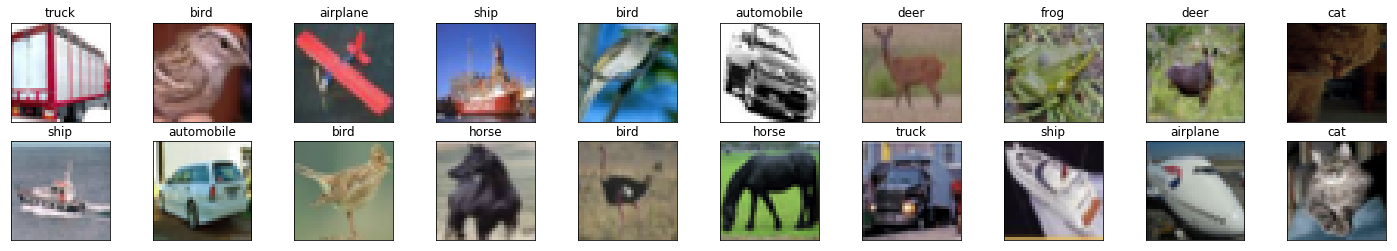

In [14]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])